Mean Squared Error: 590.3662311322271
R-squared: 0.7861964309911222


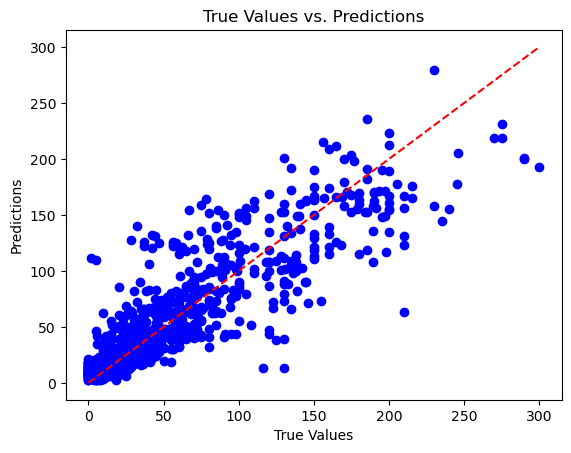

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()

encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

Y2_ = data2['Farm Milk Production per \nDay']
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder', 'Farm Milk Production per \nDay'], axis=1)

data2 = data2.join(encoded_data2)
data2 = data2.join(Y2_)

data2 = data2.to_numpy()
X2 = data2[:, :-1]
Y2 = data2[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # You can adjust hyperparameters as needed
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=150; total time=   1.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=150; total time=   1.6s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=50; total time=   0.7s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=50; total time=   0.7s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=50; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   1.5s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   1.5s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.

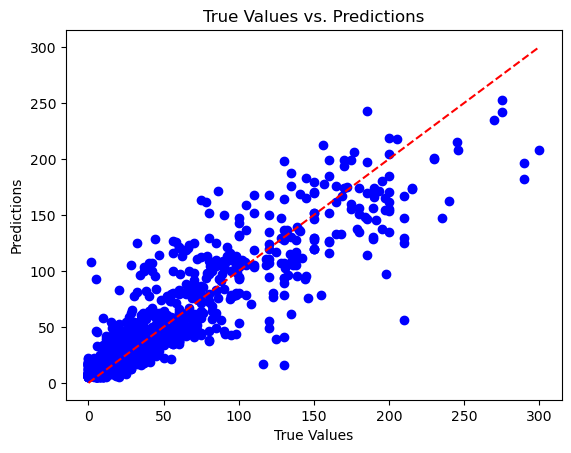

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()

encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

Y2_ = data2['Farm Milk Production per \nDay']
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder', 'Farm Milk Production per \nDay'], axis=1)

data2 = data2.join(encoded_data2)
data2 = data2.join(Y2_)

data2 = data2.to_numpy()
X2 = data2[:, :-1]
Y2 = data2[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create and train the Gradient Boosting Regression model with GridSearchCV
gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()



Gradient Boosting Feature ranking:
Breed_Murah: 0.3515514629481451
Breed_H.F: 0.1733222941615627
Breed_Jersi: 0.14301750690680734
Breed_N.R.: 0.09762950513956076
Breed_Brown: 0.08323606983466884
Age of 1st Calving: 0.037814004898195114
Milk Production/Day: 0.030894752361594047
Breed_0: 0.024174017161417063
Farm Size: 0.015525560068953646
Parity/Lactation no.: 0.01124056214898974
Breed_MurahN.R.: 0.010811854730107899
Breed_3: 0.01017306180000867
Breed_MurahBrown: 0.007977222641091485
Age: 0.002632125198897479
Breed_2: 0.0

Mean Squared Error (Gradient Boosting): 0.001153185262765655
R-squared (Gradient Boosting): 0.8173280810706135


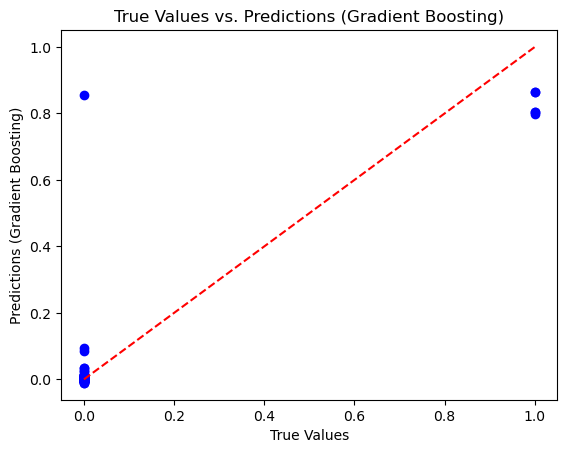

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
data = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")
data.fillna(0, inplace=True)

# create dummy variables for the 'breed' column
dummies = pd.get_dummies(data['Breed'], prefix='Breed')

# concatenate the original DataFrame with the dummy variables
data = pd.concat([data, dummies], axis=1)

# drop the original 'breed' column
data.drop('Breed', axis=1, inplace=True)

# Split the data into features (X) and target (y) variables
X = data.iloc[:, :-1]  # all columns except the last one
y = data.iloc[:, -1]   # the last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor(random_state=42)
rand_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rand_search_gb.fit(X_train, y_train)
best_params_gb = rand_search_gb.best_params_

# Optimized Gradient Boosting
optimized_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)
optimized_gb_model.fit(X_train, y_train)

# Feature Importance for Gradient Boosting
feature_importance_gb = optimized_gb_model.feature_importances_
feature_names_gb = X_train.columns

# Sort feature importances in descending order
indices_gb = np.argsort(feature_importance_gb)[::-1]

# Print the feature ranking for Gradient Boosting
print("\nGradient Boosting Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{feature_names_gb[indices_gb[f]]}: {feature_importance_gb[indices_gb[f]]}")

# Make predictions on the test set for Gradient Boosting
y_pred_gb = optimized_gb_model.predict(X_test)

# Calculate Mean Squared Error and R-squared for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'\nMean Squared Error (Gradient Boosting): {mse_gb}')
print('R-squared (Gradient Boosting):', r2_gb)

# Visualize the results for Gradient Boosting (optional)
plt.scatter(y_test, y_pred_gb, color='Blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions (Gradient Boosting)')
plt.title('True Values vs. Predictions (Gradient Boosting)')
plt.show()


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# Assuming 'Farm Milk Production per \nDay' is the target variable
y = data['Farm Milk Production per \nDay']
X = data.drop(['Farm Milk Production per \nDay'], axis=1)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]))

# Combine the encoded data with the original dataset
X = pd.concat([X.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1), X_encoded], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the XGBoost Regression model with the best parameters
xgb_model = XGBRegressor(**best_params, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (XGBoost)')
plt.show()


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


NameError: name 'XGBRegressor' is not defined

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor  # Add this import statement
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# Assuming 'Farm Milk Production per \nDay' is the target variable
y = data['Farm Milk Production per \nDay']
X = data.drop(['Farm Milk Production per \nDay'], axis=1)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]))

# Combine the encoded data with the original dataset
X = pd.concat([X.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1), X_encoded], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the XGBoost Regression model with the best parameters
xgb_model = XGBRegressor(**best_params, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (XGBoost)')
plt.show()


ModuleNotFoundError: No module named 'xgboost'

Root Mean Squared Error: 15.564284406521562
R-squared: 0.9029038887016352


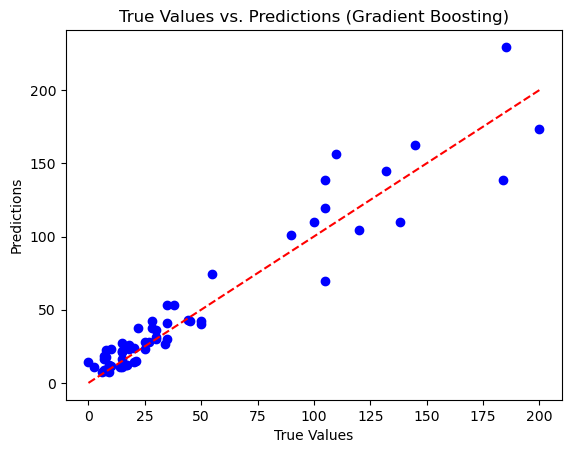

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

# Convert all column names to strings
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=8, learning_rate=0.01, random_state=42)
gb_model.fit(X_train_scaled, y_train)
           
             # Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)
             

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Gradient Boosting)')
plt.show()


Root Mean Squared Error: 13.938460400538624
R-squared: 0.9221294697908182


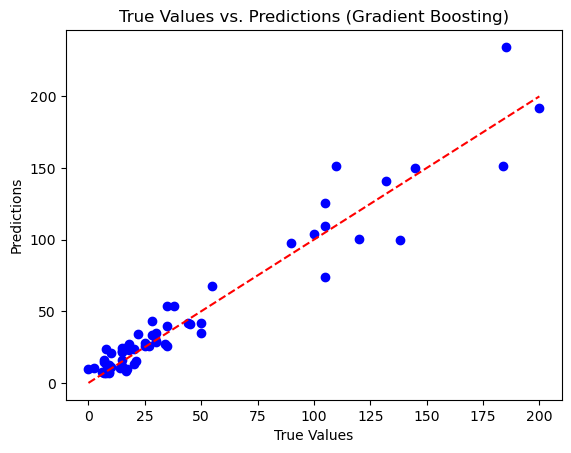

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

# Convert all column names to strings
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=10, learning_rate=0.01, random_state=42)
gb_model.fit(X_train_scaled, y_train)
           
             # Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)
             

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Gradient Boosting)')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

# Convert all column names to strings
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=250, max_depth=10, learning_rate=0.01, random_state=42)
gb_model.fit(X_train_scaled, y_train)
           
             # Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)
             

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Gradient Boosting)')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

In [5]:
data2.shape

(5943, 44)

In [14]:
data2.head()

,Green Fodder given \nto in milk,Dry Fodder given to\n in milk,Max T,Min T,Mean T,RH,Rainfall,THI,farm size,Farm Milk Production per \nDay,...,24,25,26,27,28,29,30,31,32,33
0,33,3.0,35.450,20.175,27.8125,50.875,6.400,75.297375,1,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30,4.0,39.560,24.500,32.0300,39.200,7.760,78.860300,1,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,3.0,37.175,26.550,31.8625,55.250,16.600,81.502875,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,3.0,32.900,27.325,30.1125,75.875,28.275,82.388375,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,35,2.5,33.750,25.900,29.8250,73.500,69.850,81.592125,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from Excel
data2 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx', sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

# Convert feature names to strings
data2.columns = data2.columns.map(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Grid Search for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001],
    'coef0': [0, 1, 10]
}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_svr_model = grid_search.best_estimator_
y_pred_grid = best_svr_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error and R-squared for the tuned model
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
r2_grid = r2_score(y_test, y_pred_grid)
print(f'Root Mean Squared Error (Grid Search): {rmse_grid}')
print('R-squared (Grid Search):', r2_grid)

# Visualize the results (optional)
plt.scatter(y_test, y_pred_grid, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (SVR - Grid Search)')
plt.show()


Root Mean Squared Error: 13.869433277833835
R-squared: 0.9228988329488492


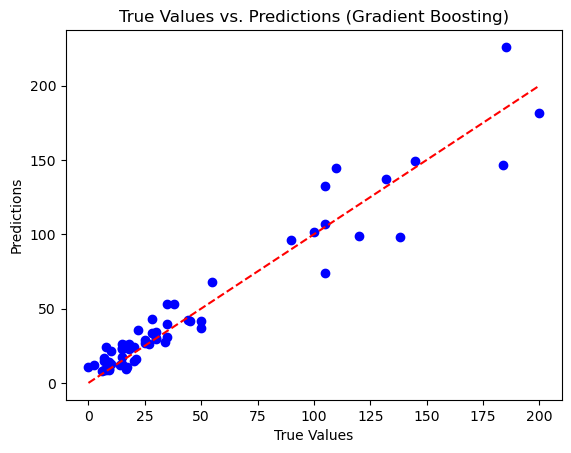

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Gradient Boosting Feature ranking:
Breed_Murah: 0.3515514629481451
Breed_H.F: 0.1733222941615627
Breed_Jersi: 0.14301750690680734
Breed_N.R.: 0.09762950513956076
Breed_Brown: 0.08323606983466884
Age of 1st Calving: 0.037814004898195114
Milk Production/Day: 0.030894752361594047
Breed_0: 0.024174017161417063
Farm Size: 0.015525560068953646
Parity/Lactation no.: 0.01124056214898974
Breed_MurahN.R.: 0.010811854730107899
Breed_3: 0.01017306180000867
Breed_MurahBrown: 0.007977222641091485
Age: 0.002632125198897479
Breed_2: 0.0

Mean Squared Error (Gradient Boosting): 0.001153185262765655
Root Mean Squared Error (Gradient Boosting): 0.033958581577646245
R-squared (Gradient Boosting): 0.8173280810706135


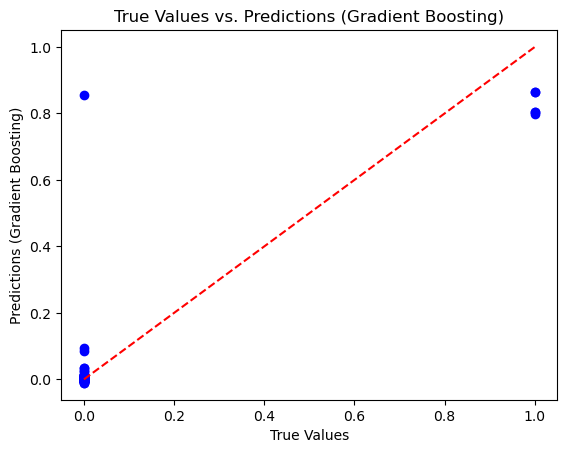

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
data = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")
data.fillna(0, inplace=True)

# create dummy variables for the 'breed' column
dummies = pd.get_dummies(data['Breed'], prefix='Breed')

# concatenate the original DataFrame with the dummy variables
data = pd.concat([data, dummies], axis=1)

# drop the original 'breed' column
data.drop('Breed', axis=1, inplace=True)

# Split the data into features (X) and target (y) variables
X = data.iloc[:, :-1]  # all columns except the last one
y = data.iloc[:, -1]   # the last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor(random_state=42)
rand_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rand_search_gb.fit(X_train, y_train)
best_params_gb = rand_search_gb.best_params_

# Optimized Gradient Boosting
optimized_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)
optimized_gb_model.fit(X_train, y_train)

# Feature Importance for Gradient Boosting
feature_importance_gb = optimized_gb_model.feature_importances_
feature_names_gb = X_train.columns

# Sort feature importances in descending order
indices_gb = np.argsort(feature_importance_gb)[::-1]

# Print the feature ranking for Gradient Boosting
print("\nGradient Boosting Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{feature_names_gb[indices_gb[f]]}: {feature_importance_gb[indices_gb[f]]}")

# Make predictions on the test set for Gradient Boosting
y_pred_gb = optimized_gb_model.predict(X_test)

# Calculate Mean Squared Error and R-squared for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'\nMean Squared Error (Gradient Boosting): {mse_gb}')
print(f'Root Mean Squared Error (Gradient Boosting): {rmse_gb}')
print('R-squared (Gradient Boosting):', r2_gb)

# Visualize the results for Gradient Boosting (optional)
plt.scatter(y_test, y_pred_gb, color='Blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions (Gradient Boosting)')
plt.title('True Values vs. Predictions (Gradient Boosting)')
plt.show()


R^2 score (Gradient Boosting Regression): 0.14860608895982252
Mean Squared Error (Gradient Boosting Regression): 19.263454441034238
Root Mean Squared Error (Gradient Boosting Regression): 4.38901520173196


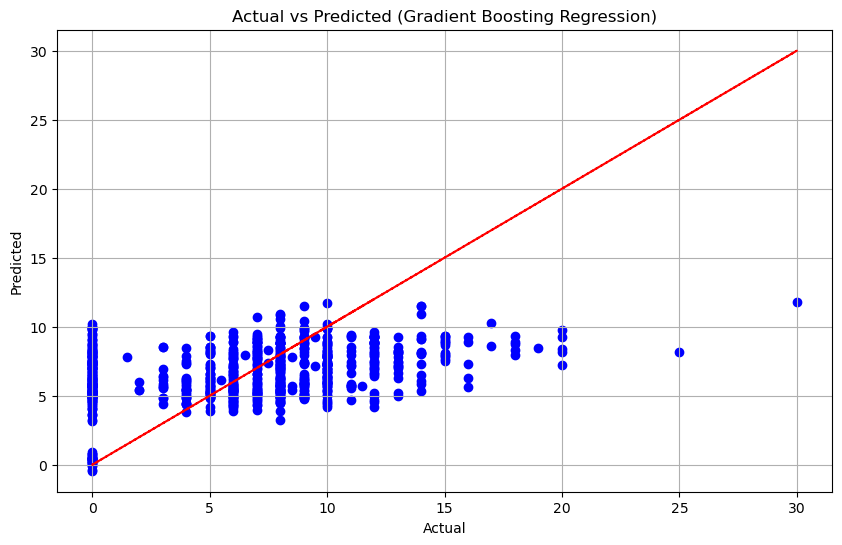

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data1 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")

# One-hot encoding for categorical variable
encoder = OneHotEncoder()
encoded_data1 = pd.DataFrame(encoder.fit_transform(data1[['Breed']]).toarray())

# Separate target variable
Y1_ = data1['Milk Production/Day']
data1 = data1.drop(['Breed','Milk Production/Day'], axis=1)

# Combine encoded data and target variable
data1 = data1.join(encoded_data1)
data1 = data1.join(Y1_)

# Convert to numpy arrays
data1 = data1.to_numpy()
X1 = data1[:,0:-1]
Y1 = data1[:,-1]

# Split data into train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X1_train, Y1_train)
y_pred_gbr = gbr.predict(X1_test)

# Model evaluation
r_squared_gbr = r2_score(Y1_test, y_pred_gbr)
mse_gbr = mean_squared_error(Y1_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("R^2 score (Gradient Boosting Regression):", r_squared_gbr)
print("Mean Squared Error (Gradient Boosting Regression):", mse_gbr)
print("Root Mean Squared Error (Gradient Boosting Regression):", rmse_gbr)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(Y1_test, y_pred_gbr, color='blue')
plt.plot(Y1_test, Y1_test, color='red', linestyle='--')
plt.title('Actual vs Predicted (Gradient Boosting Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


In [ ]:
print(y_pred_gbr)